In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
plt.style.use('ggplot')

Blue

In [ ]:
p_strong = 0.98
p_weak = 0.9
n = 20

In [ ]:
df = pd.DataFrame(columns=['k', 'prob_strong', 'prob_weak'])

data = []

# Вычисление вероятностей прохождения теста для каждого значения k от 0 до 30
for k in range(n + 1):
    prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)

    # Добавление в список
    data.append({'k': k, 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

# Создание DataFrame из списка
df = pd.DataFrame(data)


# Вывод таблицы
df_title = "Вероятность преодолеть порог k задач\nдля сильного и слабого кандидата"
df.style.hide(axis="index").set_caption(df_title)

k,strong_pass_prob,weak_pass_prob
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,1.000000,1.000000
4,1.000000,1.000000
5,1.000000,1.000000
6,1.000000,1.000000
7,1.000000,1.000000
8,1.000000,1.000000
9,1.000000,1.000000


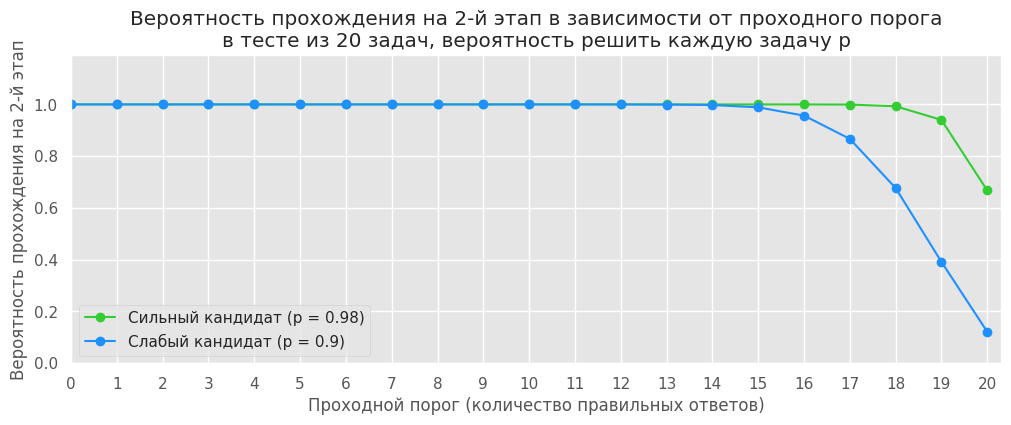

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['k'], df['strong_pass_prob'],   color='limegreen', marker='o', label='Сильный кандидат (p = 0.98)')
plt.plot(df['k'], df['weak_pass_prob'],  color='dodgerblue', marker='o', label='Слабый кандидат (p = 0.9)')
plt.title('''Вероятность прохождения на 2-й этап в зависимости от проходного порога
в тесте из 20 задач, вероятность решить каждую задачу p''')
plt.xlabel('Проходной порог (количество правильных ответов)')
plt.ylabel('Вероятность прохождения на 2-й этап')
plt.xticks(df['k'])
plt.ylim(0, 1.19)
plt.xlim(0, 20.3)
plt.legend()
plt.show()

Red

In [ ]:
data = []

for n in range(1, 31):
    k = sps.binom.ppf(0.2, n, p_strong)
    prob_strong = sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = sps.binom.cdf(k - 1, n, p_weak)
    data.append({'n': n, 'k': int(k), 'strong_fail_prob': prob_strong, 'weak_fail_prob': prob_weak})

df_opt = pd.DataFrame(data)

df_title = "Вероятность не преодолеть порог k задач\n для сильного и слабого кандидата"
df_opt.head(30).style.hide(axis="index").set_caption(df_title)

n,k,strong_fail_prob,weak_fail_prob
1,1,0.020000,0.100000
2,2,0.039600,0.190000
3,3,0.058808,0.271000
4,4,0.077632,0.343900
5,5,0.096079,0.409510
6,6,0.114158,0.468559
7,7,0.131874,0.521703
8,8,0.149237,0.569533
9,9,0.166252,0.612580
10,10,0.182927,0.651322


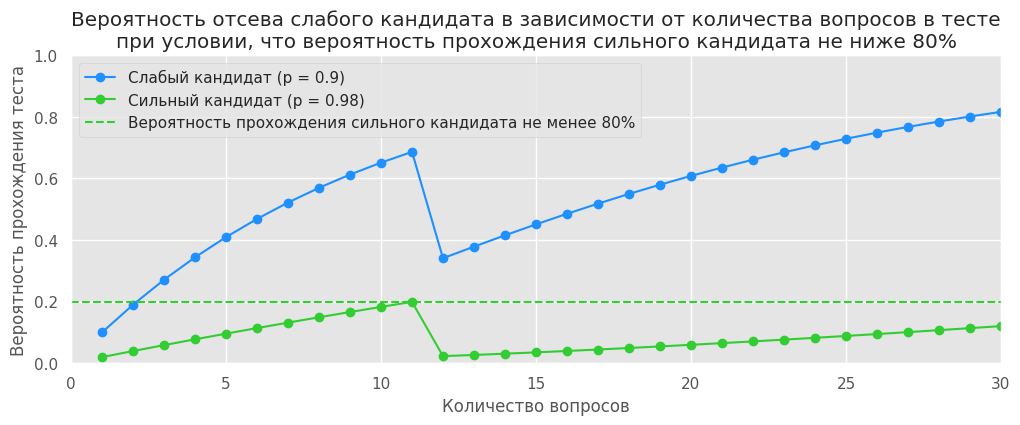

In [ ]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt['n'], df_opt['weak_fail_prob'], color='dodgerblue', marker='o',  label='Слабый кандидат (p = 0.9)')
plt.plot(df_opt['n'], df_opt['strong_fail_prob'],  color='limegreen', marker='o', label='Сильный кандидат (p = 0.98)')
plt.title('''Вероятность отсева слабого кандидата в зависимости от количества вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.2, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')


plt.xlim([0,30])
plt.ylim([0,1])
plt.legend()
plt.show()

Black

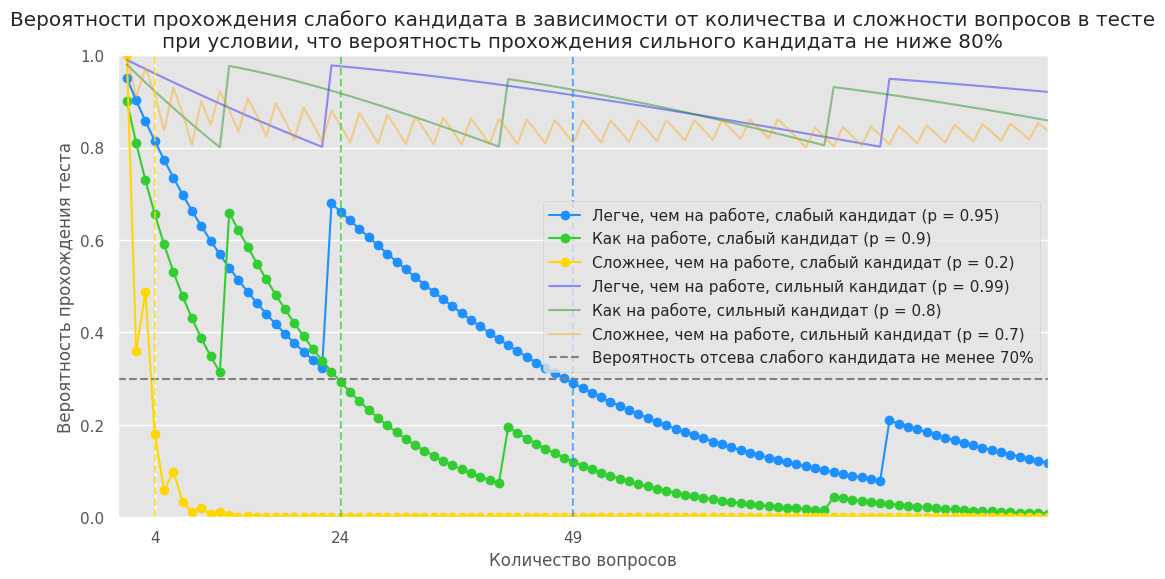

In [ ]:
def opt_quest(p_strong, p_weak):
  table = []
  for n in range(1, 101):
      k = sps.binom.ppf(0.2, n, p_strong)
      prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
      prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)
      table.append({'n': n, 'k': int(k), 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

  df_opt = pd.DataFrame(table)

  return df_opt

def min_n_func(df_opt):
  df_opt2 = df_opt[df_opt['weak_pass_prob'] < 0.3]
  min_n = df_opt2['n'].min()
  min_prob_weak = df_opt2[df_opt2['n'] == min_n]['weak_pass_prob'].values[0]
  return min_n

def loc_min(df_opt):
  local_minima = []
  for i in range(1, len(df_opt) - 1):
      if df_opt.iloc[i]['weak_pass_prob'] < df_opt.iloc[i - 1]['weak_pass_prob'] and \
        df_opt.iloc[i]['weak_pass_prob'] < df_opt.iloc[i + 1]['weak_pass_prob']:
          local_minima.append((df_opt.iloc[i]['n']))
  return local_minima

optimal_low = opt_quest(0.99,0.95)
min_n_low = min_n_func(optimal_low)
loc_min_low = loc_min(optimal_low)


optimal_hard = opt_quest(0.7,0.2)
min_n_hard = min_n_func(optimal_hard)
loc_min_hard = loc_min(optimal_hard)

optimal_m = opt_quest(0.98,0.9)
min_n_m = min_n_func(optimal_m)
loc_min_m = loc_min(optimal_m)


plt.figure(figsize=(12, 6))
plt.plot(optimal_low['n'], optimal_low['weak_pass_prob'], color='dodgerblue', marker='o', label='Легче, чем на работе, слабый кандидат (p = 0.95)')
plt.plot(optimal_m['n'], optimal_m['weak_pass_prob'], marker='o',color='limegreen',  label='Как на работе, слабый кандидат (p = 0.9)')
plt.plot(optimal_hard['n'], optimal_hard['weak_pass_prob'],color='gold', marker='o', label='Сложнее, чем на работе, слабый кандидат (p = 0.2)')

plt.plot(optimal_low['n'], optimal_low['strong_pass_prob'], color='blue', label='Легче, чем на работе, сильный кандидат (p = 0.99)', alpha=0.4)
plt.plot(optimal_m['n'], optimal_m['strong_pass_prob'], color='green',  label='Как на работе, сильный кандидат (p = 0.8)', alpha=0.4)
plt.plot(optimal_hard['n'], optimal_hard['strong_pass_prob'],color='orange', label='Сложнее, чем на работе, сильный кандидат (p = 0.7)', alpha=0.4)

plt.title('''Вероятности прохождения слабого кандидата в зависимости от количества и сложности вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')


plt.axhline(y=0.3, color='gray', linestyle='--', label='Вероятность отсева слабого кандидата не менее 70%')


plt.axvline(x=min_n_hard, color='gold', linestyle='dashed', alpha=0.7)
plt.axvline(x=min_n_m, color='limegreen', linestyle='dashed', alpha=0.7)
plt.axvline(x=min_n_low, color='dodgerblue', linestyle='dashed', alpha=0.7)

plt.xticks([min_n_hard, min_n_m, min_n_low])
plt.xlim([0,100])
plt.ylim([0,1])
plt.legend()
plt.show()

In [ ]:
optimal_low

,n,k,strong_pass_prob,weak_pass_prob
0,1,1,0.990000,0.950000
1,2,2,0.980100,0.902500
2,3,3,0.970299,0.857375
3,4,4,0.960596,0.814506
4,5,5,0.950990,0.773781
...,...,...,...,...
95,96,94,0.927833,0.135813
96,97,95,0.926060,0.131222
97,98,96,0.924268,0.126769
98,99,97,0.922457,0.122450


In [ ]:
optimal_m

,n,k,strong_pass_prob,weak_pass_prob
0,1,1,0.980000,0.900000
1,2,2,0.960400,0.810000
2,3,3,0.941192,0.729000
3,4,4,0.922368,0.656100
4,5,5,0.903921,0.590490
...,...,...,...,...
95,96,93,0.873164,0.010686
96,97,94,0.869672,0.009893
97,98,95,0.866140,0.009156
98,99,96,0.862570,0.008471


In [ ]:
optimal_hard

,n,k,strong_pass_prob,weak_pass_prob
0,1,0,1.000000,1.00000
1,2,1,0.910000,0.36000
2,3,1,0.973000,0.48800
3,4,2,0.916300,0.18080
4,5,3,0.836920,0.05792
...,...,...,...,...
95,96,63,0.852181,0.00000
96,97,64,0.835441,0.00000
97,98,65,0.817682,0.00000
98,99,65,0.853515,0.00000
